In [39]:
import pandas as pd
import gzip
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import random

In [2]:
LOCAL = 'Avenches'
# LOCAL = 'Lausanne'

In [3]:
def round_to_horizon(t):
    """ Help to round a time to 5m intervals """
    # Convert datetime.time to datetime.datetime for calculations
    dt = datetime.combine(datetime.today(), t)
    
    # Find the number of seconds since midnight
    seconds_since_midnight = (dt - dt.replace(hour=0, minute=0, second=0, microsecond=0)).seconds

    # Round to the closest 5 minutes (300 seconds)
    rounded_seconds = round(seconds_since_midnight / 300) * 300
    rounded_dt = dt.replace(hour=0, minute=0, second=0) + timedelta(seconds=rounded_seconds)

    return rounded_dt.time()

def time_to_horizon_interval(t):
    """ Return time horizon corresponding to a timestamp """
    rounded_time = round_to_horizon(t)
    
    # Convert datetime.time to datetime.datetime for calculations
    dt = datetime.combine(datetime.today(), rounded_time)
    
    # Get total minutes since midnight
    minutes_since_midnight = (dt - dt.replace(hour=0, minute=0, second=0)).seconds // 60

    # Convert total minutes to horizon intervals (5 minute intervals)
    horizon_interval = minutes_since_midnight // 5

    return horizon_interval

def convert_to_time(value):
    """ Check that all time values are correct (hours<24)"""
    try:
        # Try converting the value to datetime and extract the time
        return pd.to_datetime(value).time()
    except:
        # Return a placeholder for out-of-range values
        return 1

In [4]:
activity_file = 'Data/Original/vaud_activities.csv.gz'
population_file = 'Data/Original/vaud_population.csv.gz'

def read_gzipped_csv(file_path):
    with gzip.open(file_path, 'rt') as file:
        df = pd.read_csv(file)
    return df

activity_vaud = read_gzipped_csv(activity_file)
population_vaud = read_gzipped_csv(population_file)[['id', 'age', 'home_x', 'home_y', 'local']]

In [19]:
population_local = population_vaud[population_vaud['local'] == LOCAL] 
population_local_ids = population_local['id'].unique()
activity_local = activity_vaud[activity_vaud['id'].isin(population_local_ids)]
# a changer, aussi exclure work !!!
activity_local_filt = activity_local[~activity_local['type'].isin(['other', 'pt interaction', 'home'])] 

In [34]:
work_facilities = activity_local[activity_local['type'] == 'work'] 
print(f"There is {work_facilities['facility'].nunique()} work facilities in {LOCAL}")
work_facilities_count = work_facilities.groupby('facility')['id'].count().sort_values(ascending=True)
# print(work_facilities_count)

There is 791 work facilities in Avenches
facility
314916      1
235439      1
380994      1
232107      1
381043      1
         ... 
32472      24
125922     25
368950     26
382537     27
105296    139
Name: id, Length: 791, dtype: int64


In [71]:
work_facilities.head()

,Unnamed: 0,id,type,facility,link,x,y,start_time,end_time
122740,31849535,6326303,work,5229,782773,2600692.0,1199675.0,06:41:57,17:16:57
122745,31849540,6326305,work,30862,455903,2563500.0,1186798.0,07:04:50,15:59:50
122752,31849547,6326306,work,93897,181210,2567822.0,1190658.0,08:09:13,12:39:13
122790,31849601,6326312,work,100103,1024013,2556606.0,1175701.0,06:52:33,18:30:33
122794,31849605,6326313,work,129448,272522,2567564.0,1196424.0,09:05:00,17:15:00


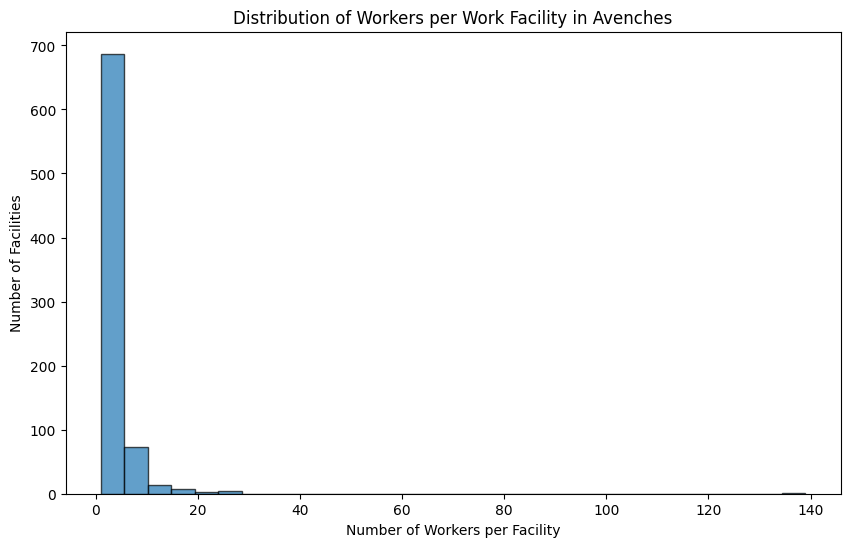

In [32]:
# work_facilities_count = work_facilities_count[:-1]
# Tracer l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(work_facilities_count, bins=30, edgecolor='black', alpha=0.7)

# Ajouter des titres et des labels
plt.title(f'Distribution of Workers per Work Facility in {LOCAL}')
plt.xlabel('Number of Workers per Facility')
plt.ylabel('Number of Facilities')

# Afficher l'histogramme
plt.show()

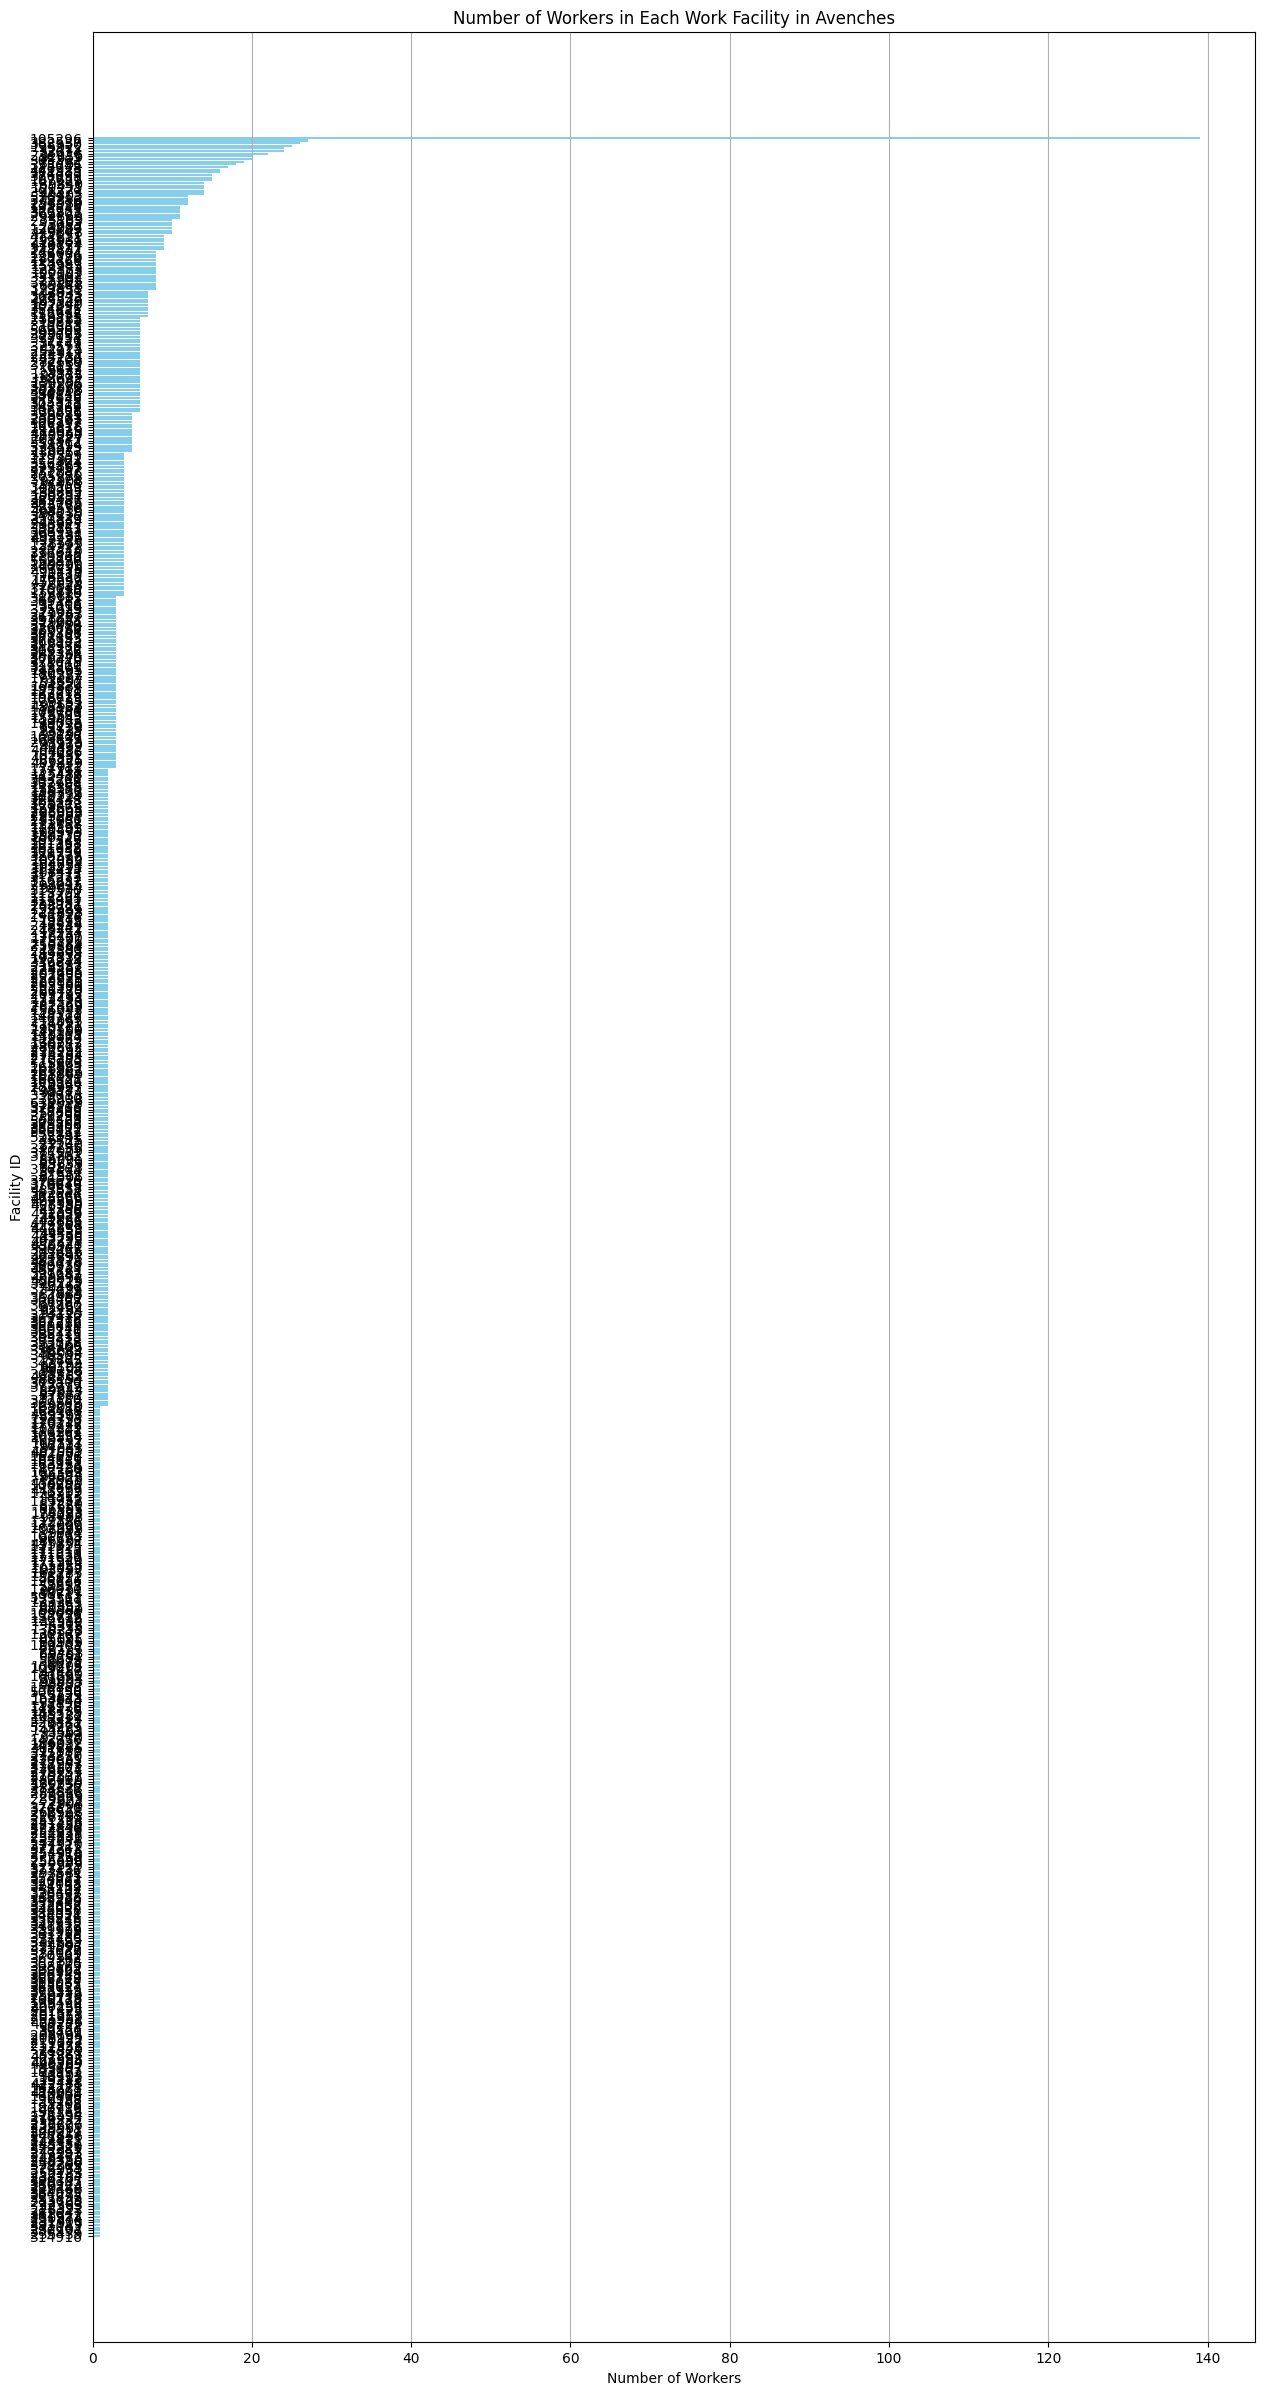

In [37]:
# Créer le diagramme à barres
plt.figure(figsize=(15, 30))  # Vous devrez peut-être ajuster la taille pour la lisibilité
plt.barh(work_facilities_count.index.astype(str), work_facilities_count.values, color='skyblue')
plt.xlabel('Number of Workers')
plt.ylabel('Facility ID')
plt.title(f'Number of Workers in Each Work Facility in {LOCAL}')
plt.grid(axis='x')

# Afficher le graphique
plt.show()


In [41]:
print(work_facilities_count)

facility
314916      1
235439      1
380994      1
232107      1
381043      1
         ... 
32472      24
125922     25
368950     26
382537     27
105296    139
Name: id, Length: 791, dtype: int64


In [70]:
# Supposons que work_facilities_count est votre DataFrame avec 'facility' comme index et un comptage des travailleurs comme valeurs
facilities = work_facilities_count.index.tolist()
workers = work_facilities_count.tolist()

# Choisir un établissement aléatoirement, avec le nombre de travailleurs comme poids
chosen_facility = random.choices(facilities, weights=workers, k=1)[0]

# Trouver le nombre de travailleurs dans l'établissement choisi
num_workers_in_chosen_facility = work_facilities_count.loc[chosen_facility]

print(f"Établissement choisi : {chosen_facility}")
print(f"Nombre de travailleurs dans l'établissement choisi : {num_workers_in_chosen_facility}")

Établissement choisi : 105296
Nombre de travailleurs dans l'établissement choisi : 139
